In [1]:
import pandas as pd

bike_data = pd.read_csv('bike_usage_0.csv', encoding = 'ANSI')
stations = pd.read_csv('stations.csv')

In [2]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36595 entries, 0 to 36594
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_out         36595 non-null  object
 1   Time_out         36595 non-null  int64 
 2   Station_no_out   36595 non-null  int64 
 3   Station_out      36595 non-null  object
 4   Membership_type  36595 non-null  object
 5   Gender           18262 non-null  object
 6   Age_Group        36595 non-null  object
 7   Momentum         36595 non-null  object
 8   Station_no_in    36595 non-null  int64 
 9   Station_in       36595 non-null  object
 10  Date_in          36595 non-null  object
 11  Bike_no          36595 non-null  object
 12  Carbon_amount    36595 non-null  object
 13  Distance         36595 non-null  int64 
 14  Duration         36595 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 4.2+ MB


In [3]:
bike_data.Gender.unique()

array([nan, 'M', 'F', 'm', 'f'], dtype=object)

In [4]:
bike_data.Gender.isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
36590    False
36591    False
36592    False
36593    False
36594     True
Name: Gender, Length: 36595, dtype: bool

In [5]:
    bike_data.loc[bike_data.Gender.isnull(), 'Gender'] = 'U'

In [9]:
bike_data.Gender.isnull().sum()

0

In [6]:
bike_data2 = pd.merge(bike_data, stations, left_on = 'Station_no_out', right_on = 'ID')

## Pie Chart

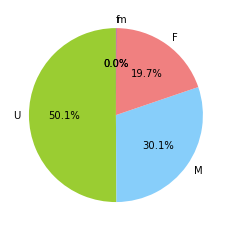

In [7]:
import matplotlib.pyplot as plt
import numpy as np

labels = bike_data2.Gender.unique()
sizes = bike_data2.Gender.value_counts()
colors = ['yellowgreen', 'lightskyblue', 'lightcoral', 'blue', 'coral']
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
plt.show()

plt.pie : 파이차트를 그릴 함수  
sizes : 각 파이 조각에 해당하는 항목의 크기를 수치로 표현  
labels : 각 파이 조각 이름 목록  
colors : 따로 지정하지 않으면 default색 사용, 색 지정 가능  
autopct = '%1.1%%' : 자동으로 비율을 계산하여 소수점 한 자리까지 표시하고 %를 붙임  
startangle : 첫번째 파이 조각의 시작 각도 지정  

## Histogram

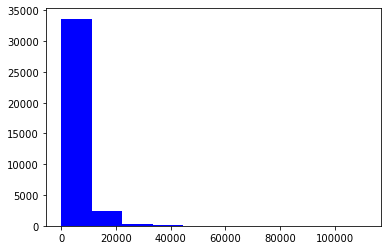

In [10]:
plt.hist(bike_data2.Distance, color = 'blue')
plt.show()

plt.hist : 첫 인자로 수치형 데이터를 필요로 함, 값을 적당한 크기로 나누어 구간을 정해 x축에 표시함  
구간의 크기를 변경 → 그래프의 느낌이 달라짐  

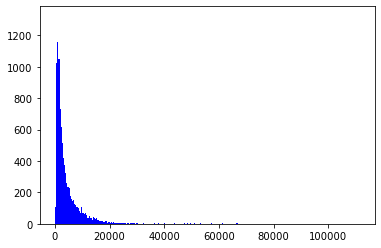

In [11]:
plt.hist(bike_data2.Distance, color = 'blue', bins = 1000)
plt.show()

## Box Plot

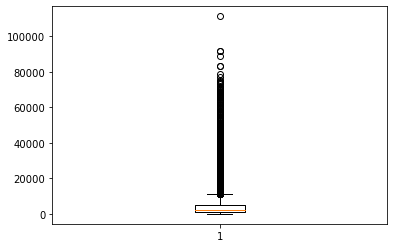

In [12]:
plt.boxplot(bike_data2.Distance)
plt.show()

이상치가 많고 값의 차이가 커서 알아보기 어려운 모양이 됨

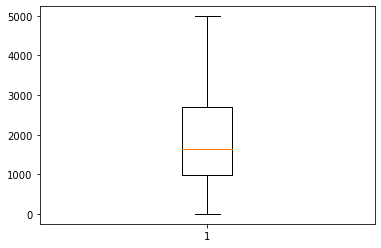

In [13]:
under_5000 = bike_data2[bike_data2.Distance < 5000]
plt.boxplot(under_5000.Distance)
plt.show()

> 성별에 따라 나누어 그리기

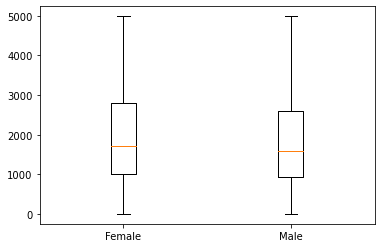

In [14]:
under_5000 = bike_data2[bike_data2.Distance < 5000]
plt.boxplot([under_5000.Distance[under_5000.Gender == 'F'], under_5000.Distance[under_5000.Gender == 'M']])
plt.xticks([1, 2], ['Female', 'Male'])
plt.show()

plt.xticks([1, 2], ['Female', 'Male']) : x축에 표시하는 눈금 지정 함수, 1과 2 위치에 Female과 Male로 표시 

## Line Graph

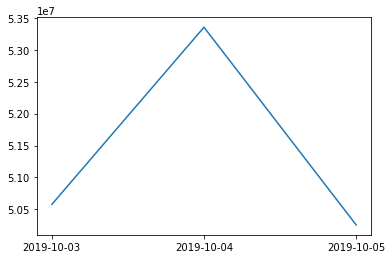

In [15]:
plt.plot(bike_data['Distance'].groupby(bike_data['Date_out']).sum())
plt.show()

## Bar Graph

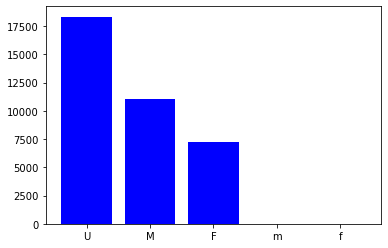

In [16]:
plt.bar(labels, height = sizes, color = 'blue')
plt.show()

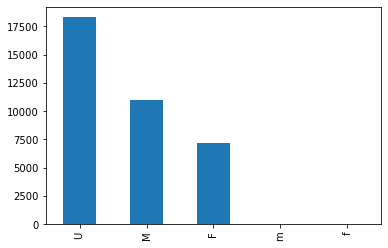

In [17]:
bike_data2['Gender'].value_counts().plot(kind = 'bar')
plt.show()